In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score


In [21]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [23]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [9]:
# Load the wine dataset
df = pd.read_csv('wine.csv')
X = df.iloc[:, :-1].values


In [10]:
# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [11]:
# Perform PCA and transform the data to its first 3 principal component scores
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)


In [12]:
# Perform hierarchical clustering
linkage = ['ward', 'complete', 'average', 'single']
for l in linkage:
    model = AgglomerativeClustering(n_clusters=3, linkage=l)
    model.fit(X_pca)
    clusters = model.labels_
    silhouette_avg = silhouette_score(X_pca, clusters)
    print(f"Linkage: {l}, Silhouette Score: {silhouette_avg:.2f}")

Linkage: ward, Silhouette Score: 0.44
Linkage: complete, Silhouette Score: 0.44
Linkage: average, Silhouette Score: 0.44
Linkage: single, Silhouette Score: 0.21


In [18]:
# Perform KMeans clustering
distortions = []
silhouette_avgs = []
for k in range(2, 10):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X_pca)
    clusters = model.labels_
    distortions.append(sum(np.min(cdist(X_pca, model.cluster_centers_, 'euclidean'), axis=1)) / X_pca.shape[0])
    silhouette_avg = silhouette_score(X_pca, clusters)
    silhouette_avgs.append(silhouette_avg)
    print(f"k: {k}, Silhouette Score: {silhouette_avg:.2f}")


k: 2, Silhouette Score: 0.44
k: 3, Silhouette Score: 0.45
k: 4, Silhouette Score: 0.41
k: 5, Silhouette Score: 0.37
k: 6, Silhouette Score: 0.35
k: 7, Silhouette Score: 0.31
k: 8, Silhouette Score: 0.32
k: 9, Silhouette Score: 0.31


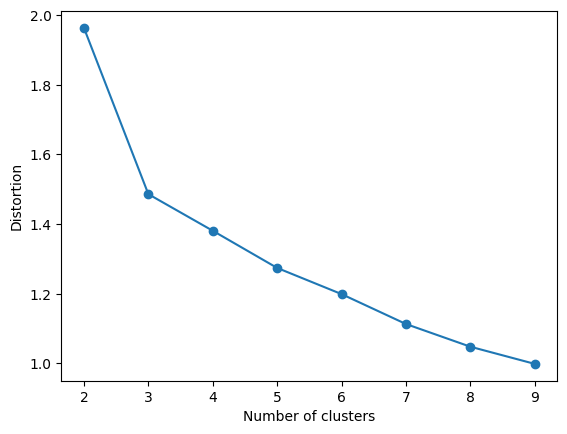

In [19]:
# Plot the elbow curve to find the optimum number of clusters for KMeans
plt.plot(range(2, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

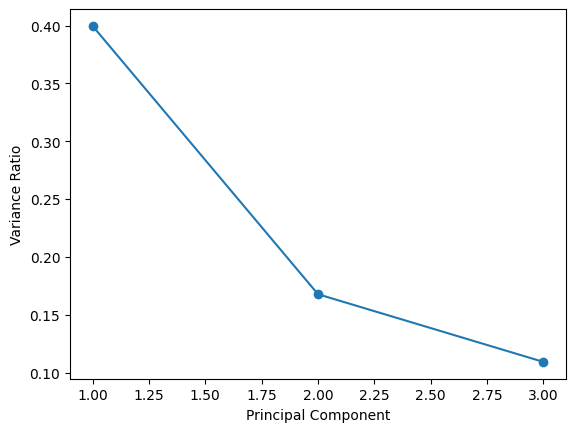

In [20]:
# Plot the scree plot to find the optimum number of clusters for hierarchical clustering
plt.plot(range(1, 4), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()